In [1]:
# Import Libraries and dependencies
import numpy as np
from numpy import *
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
# Retrieve and load data

data = pd.read_csv("data.csv")
data_df = data.drop(["County", "Confirmed cases", "Confirmed Deaths"], axis=1)


data_df.head()

State  FIPS  Population 2018  Median Household Income 2018 ($)  \
0  Alabama  1001            55533                             59338   
1  Alabama  1003           217855                             57588   
2  Alabama  1005            24872                             34382   
3  Alabama  1007            22367                             46064   
4  Alabama  1009            57771                             50412   

   Unemployment Rate 2018 (%)  Poverty Rate 2018 (%)  \
0                         3.6                   13.8   
1                         3.6                    9.8   
2                         5.1                   30.9   
3                         3.9                   21.8   
4                         3.5                   13.2   

   Confirmed cases per 100K people  Deaths per 100K people  \
0                       477.193741                9.003655   
1                       143.673544                4.131188   
2                       775.972982                4.020585   
3                       344.257165                4.470872   
4                       124.630005                1.730972   

   Mortality Rate (%)  White (%)  Black (%)  Native American (%)  Asian (%)  \
0            1.886792  76.725239  19.630942             0.480207   1.224798   
1            2.875399  87.285228   8.940382             0.772399   1.150343   
2            0.518135  49.069571  48.398376             0.659137   0.454162   
3            1.298701  76.834821  21.294643             0.437500   0.236607   
4            1.388889  95.878285   1.642462             0.653527   0.319848   

   Hispanic (%)  Dropout (%)  High School Diploma (%)  \
0      2.965774         11.3                     32.6   
1      4.646779          9.7                     27.6   
2      4.276355         27.0                     35.7   
3      2.625000         16.8                     47.3   
4      9.571231         19.8                     34.0   

   Some College_Associate Degree (%)  Bachelor Degree or Higher (%)  
0                               28.4                           27.7  
1                               31.3                           31.3  
2                               25.1                           12.2  
3                               24.4                           11.5  
4                               33.5                           12.6

In [14]:
# describe data

data_df.describe()

FIPS  Population 2018  Median Household Income 2018 ($)  \
count   2959.000000     2.959000e+03                       2959.000000   
mean   30267.689084     1.076076e+05                      52907.030416   
std    15216.579589     3.355405e+05                      14025.941509   
min     1001.000000     4.620000e+02                      25385.000000   
25%    18142.000000     1.269400e+04                      43665.000000   
50%    29111.000000     2.820400e+04                      50587.000000   
75%    45058.000000     7.313150e+04                      59011.500000   
max    56045.000000     1.007391e+07                     140382.000000   

       Unemployment Rate 2018 (%)  Poverty Rate 2018 (%)  \
count                 2959.000000            2959.000000   
mean                     4.138560              15.220953   
std                      1.442719               6.174689   
min                      1.300000               2.600000   
25%                      3.200000              10.800000   
50%                      3.900000              14.200000   
75%                      4.800000              18.400000   
max                     18.900000              54.000000   

       Confirmed cases per 100K people  Deaths per 100K people  \
count                      2959.000000             2959.000000   
mean                        372.359139               14.694736   
std                         699.561070               37.744558   
min                           0.000000                0.000000   
25%                          73.109274                0.000000   
50%                         172.516546                3.337249   
75%                         400.250881               14.105873   
max                       12704.850360             1340.900092   

       Mortality Rate (%)    White (%)    Black (%)  Native American (%)  \
count         2959.000000  2959.000000  2959.000000          2959.000000   
mean             3.465992    84.229755     9.784947             2.187493   
std              5.302961    16.255690    14.710205             7.267710   
min              0.000000     5.325320     0.000000             0.000000   
25%              0.000000    78.903678     0.935071             0.377409   
50%              1.754386    90.911038     2.855236             0.615064   
75%              5.225722    95.414974    11.683090             1.269921   
max            100.000000    99.043785    86.069762            92.515200   

         Asian (%)  Hispanic (%)  Dropout (%)  High School Diploma (%)  \
count  2959.000000   2959.000000  2959.000000              2959.000000   
mean      1.571278      9.614081    13.531869                34.284589   
std       2.783350     13.748744     6.244929                 7.212705   
min       0.000000      0.610451     1.200000                 5.500000   
25%       0.474314      2.403604     8.850000                29.900000   
50%       0.758277      4.430390    12.200000                34.600000   
75%       1.478203      9.998449    17.400000                39.300000   
max      42.952310     96.359551    48.500000                55.600000   

       Some College_Associate Degree (%)  Bachelor Degree or Higher (%)  
count                        2959.000000                    2959.000000  
mean                           30.560088                      21.622237  
std                             5.055190                       9.545845  
min                            11.400000                       5.400000  
25%                            27.200000                      14.900000  
50%                            30.500000                      19.200000  
75%                            34.000000                      25.800000  
max                            48.000000                      78.500000

In [15]:
#Min-Max normalizes/scales any list
def normalize(input_data):
    return ((np.array(input_data) - min(input_data)) / (max(input_data) - min(input_data)))

In [16]:
#Encode strings to integers using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['State', 'FIPS', 'Population 2018', 'Median Household Income 2018 ($)','Unemployment Rate 2018 (%)', 'Poverty Rate 2018 (%)',
       'Confirmed cases per 100K people', 'Deaths per 100K people','Mortality Rate (%)', 'White (%)', 'Black (%)', 'Native American (%)', 'Asian (%)', 'Hispanic (%)', 'Dropout (%)', 'High School Diploma (%)', 'Some College_Associate Degree (%)', 'Bachelor Degree or Higher (%)']
for col in cols:
    data_df[col] = le.fit_transform(data_df[col])
    
data_df.head()

State  FIPS  Population 2018  Median Household Income 2018 ($)  \
0      0     0             2003                              2153   
1      0     1             2611                              2045   
2      0     2             1329                               116   
3      0     3             1231                               946   
4      0     4             2031                              1400   

   Unemployment Rate 2018 (%)  Poverty Rate 2018 (%)  \
0                          21                     99   
1                          21                     59   
2                          36                    262   
3                          24                    179   
4                          20                     93   

   Confirmed cases per 100K people  Deaths per 100K people  \
0                             2322                     833   
1                             1288                     403   
2                             2590                     394   
3                             2066                     435   
4                             1169                      88   

   Mortality Rate (%)  White (%)  Black (%)  Native American (%)  Asian (%)  \
0                 249        671       2440                 1121       2044   
1                 385       1149       2091                 1756       1986   
2                  36        154       2845                 1566        662   
3                 160        675       2480                  976        144   
4                 177       2333       1154                 1552        314   

   Hispanic (%)  Dropout (%)  High School Diploma (%)  \
0          1013           88                      184   
1          1535           72                      134   
2          1444          243                      215   
3           859          143                      331   
4          2192          173                      198   

   Some College_Associate Degree (%)  Bachelor Degree or Higher (%)  
0                                116                            202  
1                                145                            238  
2                                 83                             47  
3                                 76                             40  
4                                167                             51

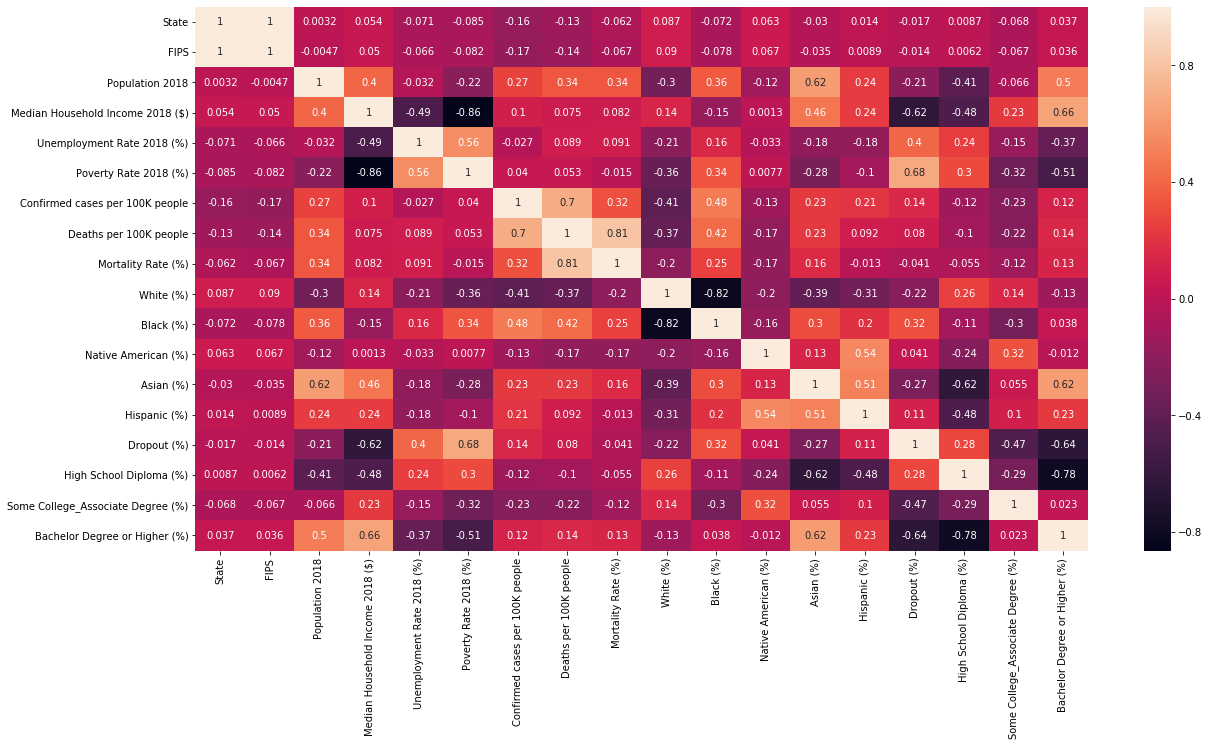

In [17]:
#Correlation among attributes
corr = data_df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [19]:
#Import StandardScaler to scale our continuous data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_df.drop('State',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
scaled_features = scaler.transform(data_df.drop("State", axis=1))

In [21]:
scaled_features

array([[-1.73146556,  0.65830416,  0.88360037, ..., -0.23989978,
        -0.43583781,  0.70980976],
       [-1.73029486,  1.3801701 ,  0.75214143, ..., -0.94440895,
         0.14653027,  1.11616956],
       [-1.72912416, -0.14192223, -1.59586133, ...,  0.19689591,
        -1.09853252, -1.03979494],
       ...,
       [ 1.72912416, -0.37700358,  1.1513871 , ...,  0.81686398,
         1.33134809, -0.67858623],
       [ 1.73029486, -1.25915226,  0.51235058, ..., -0.563974  ,
         1.43175638,  0.00996788],
       [ 1.73146556, -1.33276359,  0.43688341, ...,  0.21098609,
         1.35142975, -0.24965089]])

In [22]:
data_feat = pd.DataFrame(scaled_features, columns=data_df.columns[:-1])

In [23]:
data_feat.head()

State      FIPS  Population 2018  Median Household Income 2018 ($)  \
0 -1.731466  0.658304         0.883600                         -0.385057   
1 -1.730295  1.380170         0.752141                         -0.385057   
2 -1.729124 -0.141922        -1.595861                          0.713320   
3 -1.727953 -0.258276        -0.585575                         -0.165381   
4 -1.726783  0.691548        -0.032961                         -0.458282   

   Unemployment Rate 2018 (%)  Poverty Rate 2018 (%)  \
0                   -0.227287               1.020165   
1                   -0.908222              -0.194191   
2                    2.547522               1.334911   
3                    1.134582               0.719512   
4                   -0.329427              -0.333948   

   Confirmed cases per 100K people  Deaths per 100K people  \
0                         0.490821               -0.249172   
1                        -0.233877                0.123876   
2                        -0.249046               -0.833431   
3                        -0.179946               -0.493299   
4                        -0.764761               -0.446668   

   Mortality Rate (%)  White (%)  Black (%)  Native American (%)  Asian (%)  \
0           -0.945992   1.131015  -0.418666             0.673839  -0.544979   
1           -0.386263   0.722349   0.325594             0.605762   0.066393   
2           -1.551389   1.605254   0.102902            -0.948261  -0.040187   
3           -0.941308   1.177853  -0.588615            -1.556255  -0.725345   
4            1.000178  -0.374842   0.086493            -1.356720   0.835878   

   Hispanic (%)  Dropout (%)  High School Diploma (%)  \
0     -0.360444    -0.239900                -0.435838   
1     -0.626232    -0.944409                 0.146530   
2      2.214371     0.196896                -1.098533   
3      0.553200     1.831357                -1.239104   
4      1.051551    -0.042637                 0.588327   

   Some College_Associate Degree (%)  
0                           0.709810  
1                           1.116170  
2                          -1.039795  
3                          -1.118809  
4                          -0.994644

In [24]:
#Importing train test split for splitting into train and test datasets
from sklearn.model_selection import train_test_split

In [95]:
#Dividing predictors and predicted variables
X = data_feat
y= data_df['Deaths per 100K people']

In [96]:
# spliting the data into test (30 percent) and train sets (70 percent) with 101 random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [97]:
#Importing KNeighborsCLassifier
from sklearn.neighbors import KNeighborsClassifier

In [98]:
#Specifying a variable to KNeighborsClassifier
knc = KNeighborsClassifier()

In [99]:

#Fitting on the training dataset
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [100]:
#Predicting on test dataset
pred = knc.predict(X_test)
pred

array([   0,    0,   11,  215,  492,    0,    0,  114, 1147, 1437,    0,
          0,  538,    0,  870,    0, 1354,    0,  650,  968,   11,  361,
        570,    0,    0,  237,  190,  759,  454, 1406,  469,  933,  258,
        654, 1380, 1147,  327,    0,    0,  480,    0,  605, 1093,    0,
          0,    0,  643, 1004,    0, 1365,    0, 1079,    0,    0,    0,
       1074,    0,    0, 1494,  357,    0,  890,  507,   12,  645,    0,
          0,    0,  238,    0, 1402,   34,  380,   60,    2,  869,    0,
        362,  663,  281,    0,  119,  966,    0, 1231,  319,  209,    0,
          0,    0,  652,    0,    0,    0,  840,  175,   80,  372,  315,
          0,  750,    0,    0,  111,    0,  558,    0,    0,    0,  972,
          0,    0,    0,    0,  496,  967,   58, 1139, 1226,  873,    0,
       1307,   30, 1227, 1103,  387,   75, 1075, 1089,    0,    0,  302,
        605,    0,    0,  952,    0, 1213,    0,    0,  190,  169,    0,
       1124,    0,   25,    0, 1258,  415,    0,  7

In [101]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.79      0.99      0.88       350
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          28       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [102]:
print(confusion_matrix(y_test,pred))


[[348   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [103]:
# Ploting and checking error rate for different neighbors
error_rate = []

for i in range(1,40):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train,y_train)
    pred_i = knc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

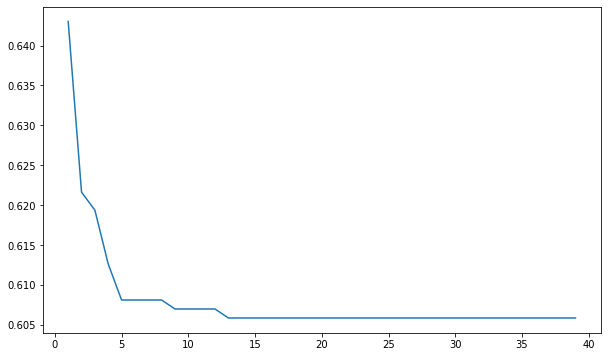

In [104]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)

In [105]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 18 columns):
State                                2959 non-null int32
FIPS                                 2959 non-null int64
Population 2018                      2959 non-null int64
Median Household Income 2018 ($)     2959 non-null int64
Unemployment Rate 2018 (%)           2959 non-null int64
Poverty Rate 2018 (%)                2959 non-null int64
Confirmed cases per 100K people      2959 non-null int64
Deaths per 100K people               2959 non-null int64
Mortality Rate (%)                   2959 non-null int64
White (%)                            2959 non-null int64
Black (%)                            2959 non-null int64
Native American (%)                  2959 non-null int64
Asian (%)                            2959 non-null int64
Hispanic (%)                         2959 non-null int64
Dropout (%)                          2959 non-null int64
High School Diploma (%)              2

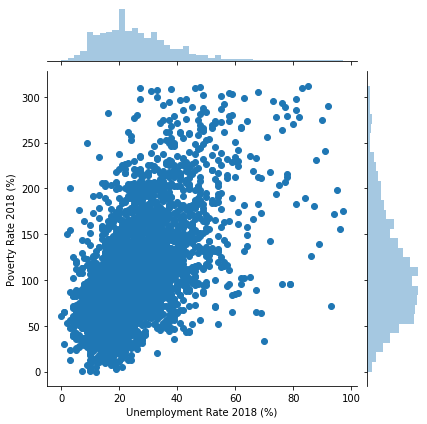

In [106]:
sns.jointplot(x='Unemployment Rate 2018 (%)',y='Poverty Rate 2018 (%)',data = data_df)


In [107]:
unemp = pd.get_dummies(data_df['Unemployment Rate 2018 (%)'],drop_first = True)


In [108]:
feats = ['State']
final_data = pd.get_dummies(data_df, columns = feats,drop_first = True)
final_data.head()

FIPS  Population 2018  Median Household Income 2018 ($)  \
0     0             2003                              2153   
1     1             2611                              2045   
2     2             1329                               116   
3     3             1231                               946   
4     4             2031                              1400   

   Unemployment Rate 2018 (%)  Poverty Rate 2018 (%)  \
0                          21                     99   
1                          21                     59   
2                          36                    262   
3                          24                    179   
4                          20                     93   

   Confirmed cases per 100K people  Deaths per 100K people  \
0                             2322                     833   
1                             1288                     403   
2                             2590                     394   
3                             2066                     435   
4                             1169                      88   

   Mortality Rate (%)  White (%)  Black (%)  ...  State_41  State_42  \
0                 249        671       2440  ...         0         0   
1                 385       1149       2091  ...         0         0   
2                  36        154       2845  ...         0         0   
3                 160        675       2480  ...         0         0   
4                 177       2333       1154  ...         0         0   

   State_43  State_44  State_45  State_46  State_47  State_48  State_49  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   State_50  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 67 columns]

In [109]:
from sklearn.tree import DecisionTreeClassifier


In [110]:
X = final_data.drop('Unemployment Rate 2018 (%)', axis=1)
y - final_data['Unemployment Rate 2018 (%)']

0       812
1       382
2       358
3       411
4        68
       ... 
2954    -25
2955    -14
2956    -27
2957    -26
2958    -18
Length: 2959, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

In [112]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()


In [113]:
dtree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [114]:
pred = dtree.predict(X_test)


In [115]:
from sklearn.metrics import classification_report, confusion_matrix


In [116]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [117]:
confusion_matrix(y_test,pred)


array([[350,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [118]:
from sklearn.ensemble import RandomForestClassifier


In [119]:
rtree = RandomForestClassifier()
rtree.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
prediction = rtree.predict(X_test)


In [121]:
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95       350
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [122]:
confusion_matrix(y_test,prediction)


array([[350,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)